In [1]:
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [17]:
def RemoveEmpty(dic):
    delind = []
    for val in dic:
        if kappa[val] == '':
            delind.append(val)
    for i in delind:
        del dic[i]
    return dic

In [21]:
kappa = RemoveEmpty(pickle.load(open("doc.p", "rb")))
data = []
for key in kappa:
    data.append(kappa[key])  
tfidf = TfidfVectorizer()
data = tfidf.fit_transform(data).toarray()

(76, 1814)


In [40]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.spatial.distance import cosine

In [46]:
dist = pdist(data, 'cosine')
Z = hierarchy.linkage(dist, method='average')

In [71]:
def hierarchy_draw(Z):
    a = plt.figure(figsize=(30, 30))
    hierarchy.dendrogram(Z, count_sort=True)
    a.show()
    a.savefig('foo.pdf')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


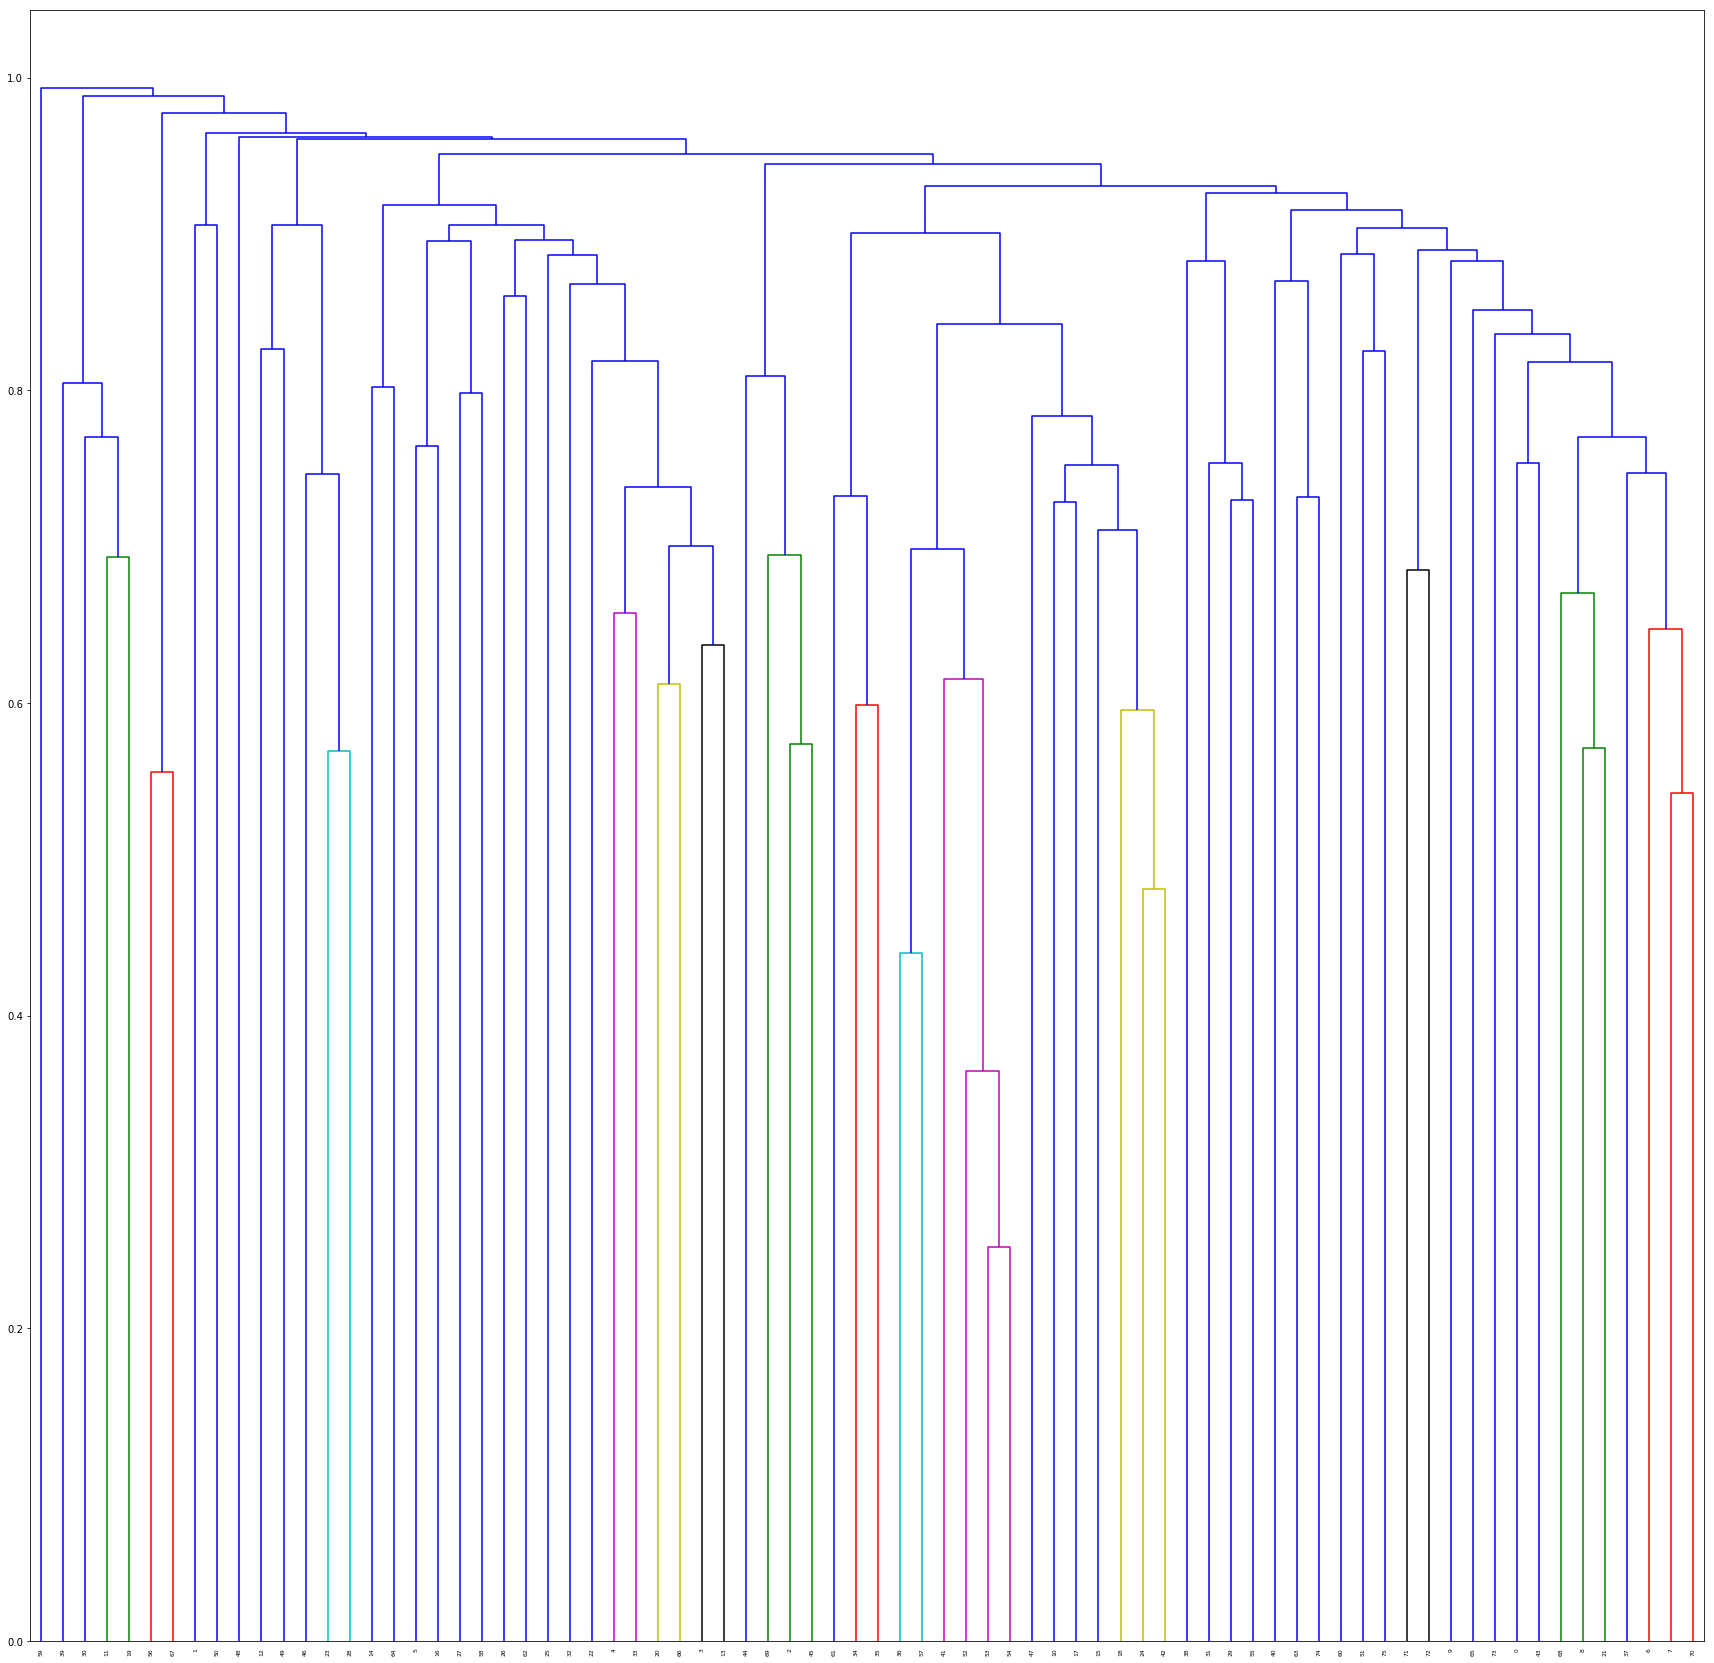

In [72]:
hierarchy_draw(Z)
